In [2]:
# Numpy library to use matrices
import numpy as np

# Load display library for jupyter notebook
import matplotlib
from matplotlib import pyplot as plt

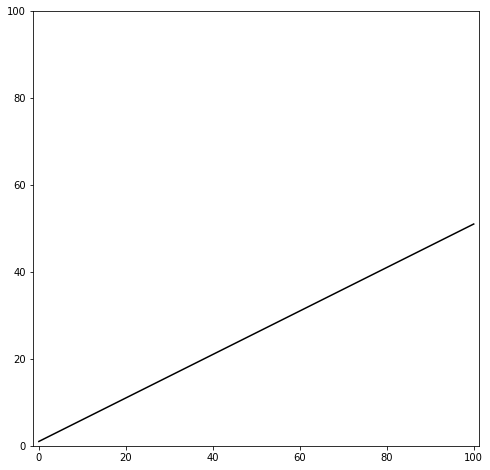

In [3]:
# This is a function to plot images using something called the matplotlib. 
# No need to understand it, just to show you how it works!
x = np.linspace(0,100,100)

fig = plt.figure()
plt.axis("equal")
plt.axis([0, 100, 0, 100])
fig.set_size_inches(8, 8)

plt.plot(x, 0.5*x + 1, 'k')

In [6]:
N = 100

def show_canvas(canvas, title=""):
    # Similar to doing cv2.imshow, but in this environment
    plt.figure(figsize = (8,8))
    plt.imshow(canvas, cmap="gray", norm=matplotlib.colors.NoNorm()) 
    plt.title(title)
    
def reset_canvas(size):
    return np.ones((size,size))
    

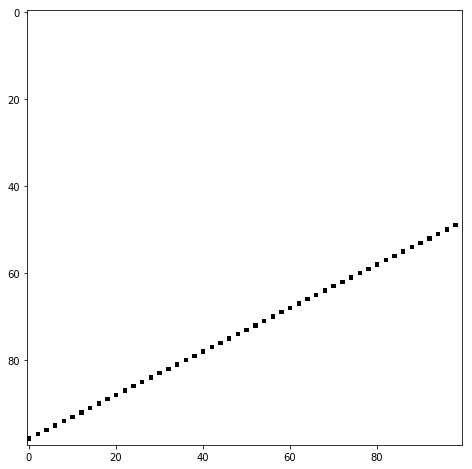

In [7]:
# The not-so-clever algorithm from last time -- test all pixels
canvas = reset_canvas(N)
for y in range(0, N):
    for x in range(0, N):
        if y == 0.5*x + 1:
            canvas[(N - 1) - y,x] = 0 # Note that we flip y
show_canvas(canvas)


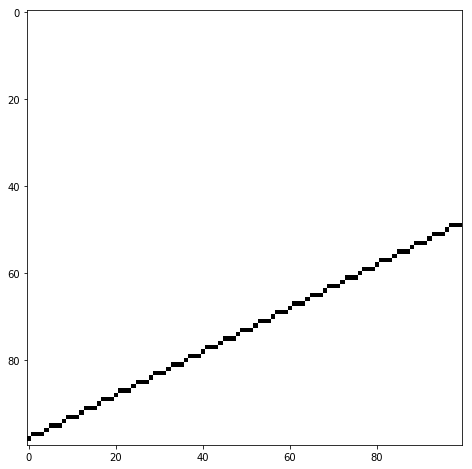

In [8]:
# A better but still naive algorithm -- follow x, compute y, draw on (x,y)
canvas = reset_canvas(N)
for x in range(0, N):
    y = int(np.round(0.5*x + 1))
    canvas[(N - 1) - y, x] = 0
show_canvas(canvas)

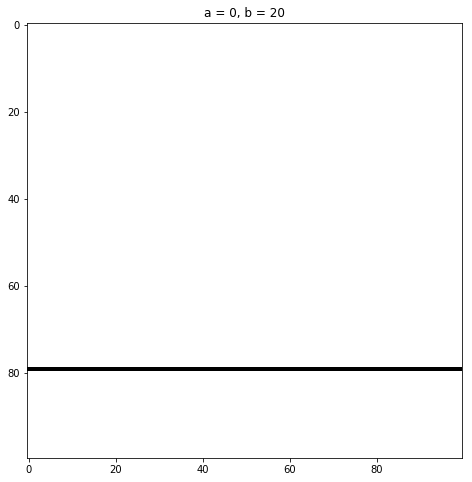

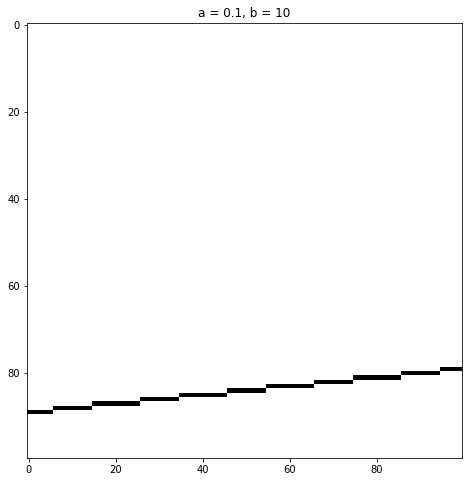

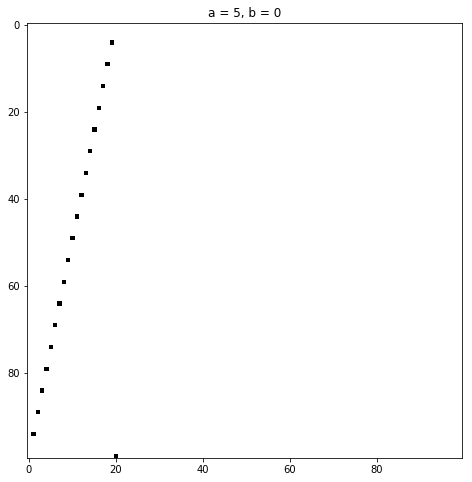

In [9]:
# What's wrong? to figure out, let's have a deeper look into what's going on
# What if we do something like y = a * x + b with different a and b

def draw_with_ab(a, b):
    canvas = reset_canvas(N)
    for x in range(0, N):
        y = int(np.round(a * x + b))
        if y > 0 and y <= N:
            canvas[(N - 1) - y, x] = 0
    show_canvas(canvas, "a = " + str(a) + ", b = " + str(b))
    
draw_with_ab(0, 20)
draw_with_ab(0.1, 10)
draw_with_ab(5, 0)


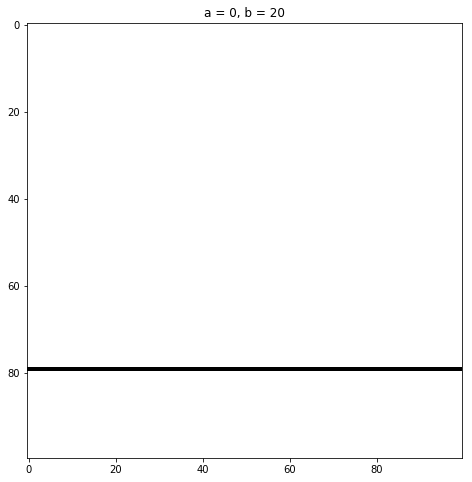

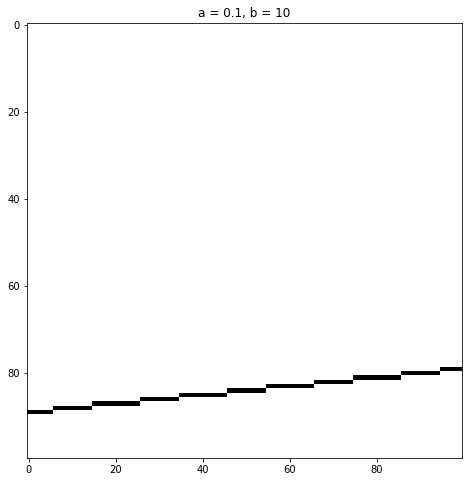

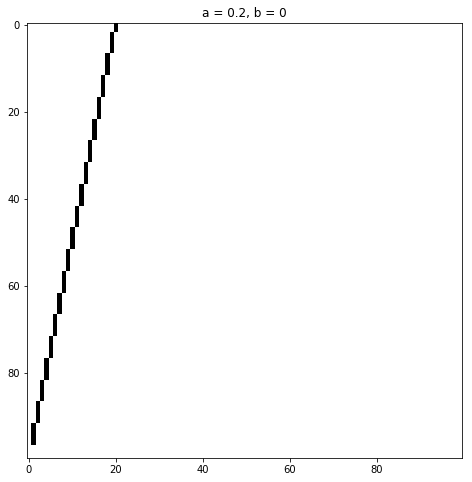

In [10]:
# Well, you can actually restrict the slope to be smaller than 1, 
# and then flip x, y if that's not the case

def draw_with_ab(a, b):
    canvas = reset_canvas(N)
    flip_xy = a >= 1
    if flip_xy:
        a = 1.0 / a
    for x in range(0, N):
        y = int(np.round(a * x + b))
        if y > 0 and y <= N:
            if flip_xy:
                canvas[(N - 1) - x, y] = 0                
            else:
                canvas[(N - 1) - y, x] = 0
    show_canvas(canvas, "a = " + str(a) + ", b = " + str(b))
    
draw_with_ab(0, 20)
draw_with_ab(0.1, 10)
draw_with_ab(5, 0)


In [ ]:
# It's still jaggy though. We'll fix that later in lecture 6.